In [ ]:
# ! pip install tensorflow


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf
import pickle
from tensorflow import  keras
from keras.layers import Conv2D
from keras.layers import Dropout,BatchNormalization
from keras.optimizers import SGD
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.optimizers import RMSprop
import cv2
import random
%matplotlib inline


In [30]:
DIRECTORY=r'D:\catdogTraining\train'
CATEGORIES=['cat','dog']

In [31]:
IMG_SIZE=100

data=[]

for category in CATEGORIES:
    folder=os.path.join(DIRECTORY,category)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        data.append([img_arr,label])
    

In [32]:
len(data)

402

In [33]:
random.shuffle(data)

In [34]:
x=[]
y=[]

for features,labels in data:
    x.append(features)
    y.append(labels)

In [38]:
x=np.array(x)
y=np.array(y)

In [39]:
x=x/255

In [40]:
x.shape

(402, 100, 100, 3)

In [41]:
model= Sequential()


model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = x.shape[1:], activation = 'relu'))

model.add(Dense(2, activation='softmax'))

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.fit(x, y, epochs=5, validation_split=0.1)

Epoch 1/5
12/12 [==============================] - 27s 2s/step - loss: 0.4631 - accuracy: 0.7922 - val_loss: 0.7784 - val_accuracy: 0.4390
Epoch 2/5
12/12 [==============================] - 24s 2s/step - loss: 0.3896 - accuracy: 0.8310 - val_loss: 0.7766 - val_accuracy: 0.5122
Epoch 3/5
12/12 [==============================] - 25s 2s/step - loss: 0.2766 - accuracy: 0.9280 - val_loss: 0.8384 - val_accuracy: 0.6829
Epoch 4/5
12/12 [==============================] - 24s 2s/step - loss: 0.1822 - accuracy: 0.9529 - val_loss: 0.9762 - val_accuracy: 0.6585
Epoch 5/5
12/12 [==============================] - 25s 2s/step - loss: 0.1176 - accuracy: 0.9778 - val_loss: 1.0672 - val_accuracy: 0.6585


In [45]:
x.shape

(402, 100, 100, 3)

In [46]:
# plt.plot(history.history['accuracy'],color='red',label='train')
# plt.plot(history.history['val_accuracy'],color='blue',label='validation')
# plt.legend()
# plt.show()

In [47]:
import cv2

In [48]:
test_img=cv2.imread(r'D:\catdogTraining\test\21.jpg')

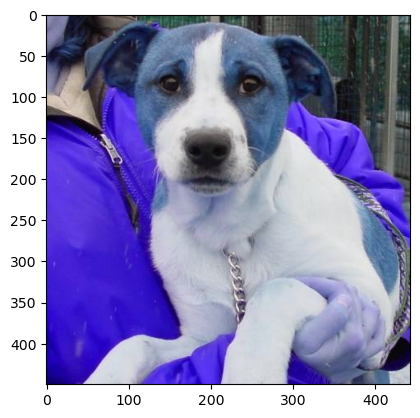

In [49]:
plt.imshow(test_img)

In [50]:
test_img.shape

(450, 443, 3)

In [51]:
test_img=cv2.resize(test_img,(256,256))

In [52]:
img_input=test_img.reshape((1,256,256,3))

In [53]:
model.predict(img_input)

ValueError: in user code:

    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 33856, but received input with shape (None, 246016)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=uint8)
      • training=False
      • mask=None


In [2]:
# image= load_image('C:\\Users\\Dell\\Desktop\\EDUONIX\\assignment\\CatDog\\TrainTest')

In [3]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset=train.flow_from_directory('C:\\Users\\Dell\\Desktop\\EDUONIX\\assignment\\CatDog\\TrainTest',
                                       target_size=(200,200,3),
                                       batch_size=16,
                                       class_mode='binary')

validation_dataset=train.flow_from_directory('C:\\Users\\Dell\\Desktop\\EDUONIX\\assignment\\CatDog\\TrainTest',
                                       target_size=(200,200,3),
                                       batch_size=16,
                                       class_mode='binary')

Found 802 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'test': 0, 'train': 1}

In [9]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Flatten(),
                                 
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 
                                 tf.keras.layers.Dense(1,activation='sigmoid')
                                 
                                
                                
                                
                                
                                
                                
                                ])

In [12]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

# cnn.fit_generator(train,validation_data=validation,epochs=1,
#                   steps_per_epoch=train.samples//batch_size,
#                   validation_steps=validation.samples//batch_size
#                  )
     

In [15]:
model_fit=model.fit(train_dataset,
                   epochs=1,
                   validation_data=validation_dataset)

ValueError: could not broadcast input array from shape (200,200,3) into shape (200,200,3,3)

In [ ]:
#initializing the cnn
model=Sequential()

In [ ]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# Creating training set
training_set = train_datagen.flow_from_directory('C:\\Users\\Dell\\Desktop\\EDUONIX\\assignment\\CatDog\\TrainTest',
                                               target_size=(224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory('C:\\Users\\Dell\\Desktop\\EDUONIX\\assignment\\CatDog\\TrainTest',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')

In [ ]:
model = Sequential()
# model.add(input_shape=(32,32,1))
model.add(Conv2D(64, (3,3),(activation="relu"),MaxPooling2D(pool_size=(2,2))
# model.add(activation="relu")
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3))
model.add(activation="relu")
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(activation="sigmoid")

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])


model.summary()

In [ ]:

# # adding first layer
# classifier.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
# classifier.add(tf.keras.layers.MaxPool2D(pool_size=2))


#step1-convolution
classifier.add(Convolution2D(32,32,3,input_shape=(32,32,1),activation='relu'))
#step2-maxpooling
classifier.add(MaxPooling2D(pool_size=(2,2)))
#step3-flattening
classifier.add(Flatten())
#step4-fullconnection
classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(output_dim=4,activation='sigmoid'))

In [ ]:
classifier.fit_generator(training_set,samples_per_epoch=8000,nb_epoch=25,validation_data=test_set,nb_val_samples=2000)

In [ ]:
#to predict new images 
def predict_image(imagepath, classifier):
    predict = image.load_img(imagepath, target_size = (64, 64))   
    predict_modified = image.img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis = 0)
    result = classifier.predict(predict_modified)
    if result[0][0] >= 0.5:
        prediction = 'dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
    else:
        prediction = 'cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)